> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# Lab 11: Linear Regression for HR

In this lab, we’ll use the merged HR dataset to build a **linear regression model** to predict the number of years that an employee will work for the company (job tenure).

### Problem Statement
A large company employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this employee turnover is bad for the company, because of the following reasons -

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to increase the number of years that employees stay with the company. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

### Goal of the case study
You are required to model the number of years employees work for the company using a llinear regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


### Analytics Objectives:
1. Load and explore the dataset
2. Clean and prepare features
3. Encode categorical variables
4. Split the data into training and test sets
5. Train and evaluate a linear regression model
6. Reflect on variable importance and model fit

**Target Variable:** `YearsAtCompany`


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

**Dataset:** `merged_hr_data.csv`  
Source: [Kaggle HR Analytics Case Study](https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study)

| Variable                      | Type        | Description |
|-------------------------------|-------------|-------------|
| `Age`                         | Numeric     | Age of the employee |
| `Attrition`                   | Categorical | Whether the employee has left the company (Yes/No) |
| `BusinessTravel`              | Categorical | Frequency of business travel |
| `Department`                  | Categorical | Department name |
| `DistanceFromHome`           | Numeric     | Distance from home to work (in km) |
| `Education`                  | Ordinal     | Employee education level (1–5) |
| `EducationField`             | Categorical | Field of education |
| `EmployeeID`                 | Identifier  | Unique identifier for employee |
| `EmployeeCount`              | Constant    | Always 1 (not useful for modeling) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the environment (1–4) |
| `Gender`                     | Categorical | Gender of the employee |
| `JobInvolvement`             | Ordinal     | Level of involvement with job (1–4) |
| `JobLevel`                   | Ordinal     | Employee level (1–5) |
| `JobRole`                    | Categorical | Job title |
| `JobSatisfaction`            | Ordinal     | Satisfaction with the job (1–4) |
| `MaritalStatus`              | Categorical | Marital status |
| `MonthlyIncome`              | Numeric     | Monthly salary in USD |
| `NumCompaniesWorked`         | Numeric     | Number of companies previously worked for |
| `Over18`                     | Constant    | Always "Y" (not useful) |
| `PercentSalaryHike`          | Numeric     | Percentage salary increase |
| `PerformanceRating`          | Ordinal     | Performance rating (1–4) |
| `StandardHours`              | Constant    | Always 80 (not useful) |
| `StockOptionLevel`           | Ordinal     | Stock options level (0–3) |
| `TotalWorkingYears`          | Numeric     | Total years of professional experience |
| `TrainingTimesLastYear`      | Numeric     | Number of training sessions attended last year |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `YearsAtCompany`             | Numeric     | Years spent at the current company |
| `YearsInCurrentRole`         | Numeric     | Years spent in current role |
| `YearsSinceLastPromotion`    | Numeric     | Years since last promotion |
| `YearsWithCurrManager`       | Numeric     | Years with current manager |
| `JobSatisfaction`            | Ordinal     | Self-reported job satisfaction (1–4) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the work environment (1–4) |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `JobInvolvement`             | Ordinal     | Employee’s job involvement level (1–4) |
| `PerformanceRating`          | Ordinal     | Most recent performance rating |



## Part 1: Load data and packages




In [2]:
import pandas as pd

# Load the merged HR dataset
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/merged_hr_data.csv"
df = pd.read_csv(url)

# Preview structure
print("Shape:", df.shape)
df.head()


Shape: (4410, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Part 2: Data Cleaning

Real-world HR data often contains administrative fields (e.g., ID numbers), constants (same value for all rows), or missing values.

### What We’re Doing:
- Remove irrelevant or constant columns: `EmployeeCount`, `Over18`, `StandardHours`, `EmployeeID`
- Drop rows with missing data

### Why It Matters:
- Non-informative or redundant features can reduce model accuracy and interpretability.
- Regression does not handle missing values natively, so we need a clean dataset.
- Dropping some rows is reasonable here due to the relatively small number of nulls.

> Ethical Note: In practice, dropping rows may disproportionately exclude certain groups—so this step should be handled with caution.


In [3]:
# Drop unnecessary columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']
df.drop(columns=drop_cols, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Check result
print("After cleaning:", df.shape)


After cleaning: (4300, 25)


## Part 3: Encode Categorical Variables

Machine learning algorithms like linear regression require **numeric inputs**. To use categorical data like `Gender` or `JobRole`, we convert them into **dummy variables** using one-hot encoding.

### Key Steps:
- Use `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity

### Why It Matters:
- Ensures model can interpret categorical inputs numerically
- Dropping the first dummy prevents the "dummy variable trap" where one variable is a linear combination of others
- Accurate encoding helps ensure model fairness and interpretability

> Reminder: Avoid encoding identifiers or columns with too many unique levels without reduction.



In [4]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview encoded columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   DistanceFromHome                   4300 non-null   int64  
 2   Education                          4300 non-null   int64  
 3   JobLevel                           4300 non-null   int64  
 4   MonthlyIncome                      4300 non-null   int64  
 5   NumCompaniesWorked                 4300 non-null   float64
 6   PercentSalaryHike                  4300 non-null   int64  
 7   StockOptionLevel                   4300 non-null   int64  
 8   TotalWorkingYears                  4300 non-null   float64
 9   TrainingTimesLastYear              4300 non-null   int64  
 10  YearsAtCompany                     4300 non-null   int64  
 11  YearsSinceLastPromotion            4300 non-null   int64  
 1

### 🔧 Try It Yourself - Part 3

1. How many new columns were created during one-hot encoding?  
2. Why is it important to avoid including columns like `EmployeeID` in modeling?
3. Our model is trying to predict employment longevity.  Why is `Attrition` problematic for predicting years at the company?

Write a few sentences on each of the questions above. No coding is required here.


1. After one-hot encoding, the dataset increased from 25 to 39 columns, meaning that 14 new columns were created. These new columns represent the different categories of the original categorical variables (e.g., Department, JobRole, MaritalStatus, etc.).
2. Columns such as EmployeeID are unique identifiers that do not carry any predictive meaning. Including them would cause the model to memorize individual employees instead of learning general patterns about tenure, which would reduce the model’s accuracy and generalization.
3. Attrition indicates whether an employee has already left the company, which is directly related to the target variable (YearsAtCompany). Including it would leak information from the future, allowing the model to “cheat” by using a variable that already reveals the outcome we are trying to predict.


### Part 4: Standardizing Features for Regression

When using models like **linear regression**, it's highly recommended to ensure all numeric features are on a similar scale. This helps the model converge more reliably and prevents features with larger magnitudes from dominating the learning process.

In this step, we'll use `StandardScaler` from `sklearn` to scale all feature columns to have a mean of 0 and a standard deviation of 1.

This is especially important your dataset includes variables with vastly different units or scales (e.g., "Age" vs. "MonthlyIncome")

> **Note:** The target variable (`YearsAtCompany`) should **not** be scaled — only the input features.

---


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate the features and the target
X = df_encoded.drop(columns=['YearsAtCompany'])
y = df_encoded['YearsAtCompany']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reconstruct scaled DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled features
X.head()

### 🔧 Try It Yourself - Part 4

You've now scaled your features using `StandardScaler`, which makes each feature have a mean of 0 and a standard deviation of 1.

**Think about this:**
Suppose we didn't standardize the features and trained a regression model using raw input data instead. What might happen to the interpretation or relative importance of the coefficients?

**Write one or two sentences** explaining how not standardizing the data could affect the model's performance or interpretability.


Comment: If we didn’t standardize the features, the regression model would implicitly give more weight to variables measured on larger numerical scales (for example, “MonthlyIncome” would dominate “JobSatisfaction”). This imbalance would distort coefficient magnitudes, making them reflect unit size rather than true predictive influence. Standardization ensures that each coefficient reflects relative importance rather than scale, improving both interpretability and numerical stability during optimization.

## Part 5: Train-Test Split

We'll split the dataset into:
- 80% for training
- 20% for testing

To preserve class proportions, we **stratify on our target variable**. This ensures fair evaluation.

> This step helps avoid training/test imbalance especially in classification tasks.



In [6]:
from sklearn.model_selection import train_test_split

# Ensure X and y are defined
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features and target again (safe redefinition)
X = df_encoded.drop(columns=['YearsAtCompany'])
y = df_encoded['YearsAtCompany']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes of the splits
X_train.shape, X_test.shape



((3440, 38), (860, 38))

### 🔧 Try It Yourself - Part 5

1. In the code cell below, calculate what average `YearsAtCompany` for all employees

### In Your Response:
1. Answer the following question in the markdown cell: Why is stratified sampling especially important for classification?


In [7]:
# Calculate the average YearsAtCompany for all employees
average_years = df_encoded['YearsAtCompany'].mean()
print(f"Average YearsAtCompany: {average_years:.2f}")

Average YearsAtCompany: 7.03


### ✍️ Your Response: 🔧
1. Stratified sampling is essential for classification because it ensures that each class is proportionally represented in both the training and testing sets. Without stratification, rare classes could be underrepresented or even absent in one of the splits, causing the model to learn biased patterns. By preserving the class distribution, we guarantee a fairer and more reliable evaluation of model performance, especially when dealing with imbalanced datasets.

## Part 6: Train the Regression

Now we fit a linear regression model using the training data.  

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display coefficients in order of highest to lowest correlation
coefficients_linear = pd.Series(linear_model.coef_, index=X.columns)
print("\nLinear Regression Coefficients (ordered):")
print(coefficients_linear.sort_values(ascending=False))



Linear Regression Coefficients (ordered):
YearsWithCurrManager                 2.837270
TotalWorkingYears                    2.483762
YearsSinceLastPromotion              1.425294
Department_Research & Development    0.229370
JobRole_Manager                      0.168073
Department_Sales                     0.144795
PercentSalaryHike                    0.080284
Attrition_Yes                        0.078947
DistanceFromHome                     0.073630
JobRole_Research Director            0.064619
EnvironmentSatisfaction              0.063373
JobInvolvement                       0.062238
JobRole_Human Resources              0.058902
JobSatisfaction                      0.053753
TrainingTimesLastYear                0.015701
JobRole_Manufacturing Director       0.012962
StockOptionLevel                     0.009874
WorkLifeBalance                      0.007276
EducationField_Other                -0.012481
JobRole_Sales Representative        -0.024281
JobRole_Research Scientist          -

### 🔧 Try It Yourself - Part 6

1. Which features are most positively associated with high job tenure (years at company)?
2. Which features are most negatively associated with staying?

### In Your Response:
Write a few sentences on each of the questions above. No coding is required here.

### ✍️ Your Response: 🔧
1. Employees who have spent more years with their current manager, have longer total working experience, and were promoted recently tend to stay longer at the company. These factors suggest that stability in management relationships, accumulated experience, and career advancement contribute to stronger organizational commitment. Additionally, roles like Manager or departments such as Research & Development show higher tenure, likely reflecting professional maturity and long-term engagement in specialized work.
2. Lower tenure is most strongly linked to employees who have worked at many companies before, those with lower education fields like Life Sciences or Medical, and individuals with frequent business travel or younger age. These patterns imply higher turnover among employees with broader external experience, more travel-related fatigue, or limited advancement opportunities. It also indicates that excessive mobility and less stability in career paths may discourage long-term retention.

## Part 7: Evaluate Model Performance

Let’s test how well our model generalizes to unseen data. We'll compute:
- Mean Squared Error (MSE)
- R-Squared

In [9]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 9.19
R-squared (R2): 0.76


Now visualize the model output

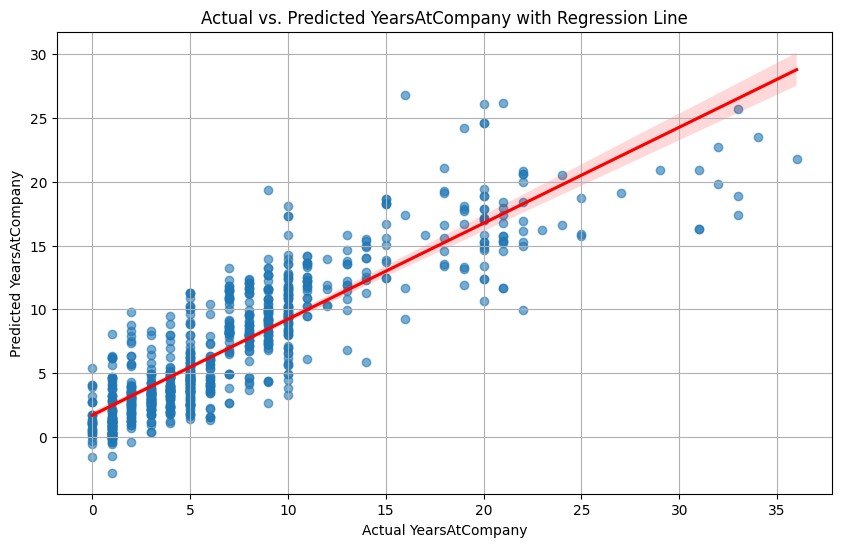

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of predicted vs actual YearsAtCompany
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
ax.set_xlabel("Actual YearsAtCompany")
ax.set_ylabel("Predicted YearsAtCompany")
plt.title("Actual vs. Predicted YearsAtCompany with Regression Line")
plt.grid(True)
plt.show()

### 🔧 Try It Yourself - Part 7

1. Is this R-squared fit good?
2. How could we improve the fit?

### ✍️ Your Response: 🔧
1. An R-squared of 0.76 indicates a strong model fit for HR data, meaning that about 76% of the variation in employee tenure is explained by the independent variables. Considering the inherently unpredictable nature of human behavior, this level of explanatory power is quite impressive. It suggests the model captures meaningful patterns, especially managerial stability, total work experience, and promotion history, as strong predictors of retention.
2. The fit could be improved by introducing non-linear relationships and interaction terms between variables such as “JobSatisfaction × WorkLifeBalance.” Additionally, feature engineering (e.g., combining experience-related metrics or grouping job roles by seniority) could help uncover deeper dynamics. Using more advanced algorithms, like Ridge or Lasso regression to manage multicollinearity, or ensemble methods like Random Forests, might further enhance predictive accuracy while maintaining interpretability.

## Part 8: Feature Selection for Accuracy Improvement

Not all features equally influence `YearsAtCompany`. By identifying and using only the most important predictors, we can:
- Simplify the model
- Potentially improve performance or interpretability
- Reduce overfitting

We’ll use the linear regression model’s coefficients to rank feature importance.


In [11]:
# Get top 10 features based on absolute coefficient magnitude
top_features = coefficients_linear.abs().sort_values(ascending=False).head(10)

# Print the top features and their weights
top_features

,0
YearsWithCurrManager,2.837270
TotalWorkingYears,2.483762
YearsSinceLastPromotion,1.425294
NumCompaniesWorked,0.863445
EducationField_Medical,0.418989
Age,0.403338
EducationField_Life Sciences,0.343684
Department_Research & Development,0.229370
EducationField_Technical Degree,0.198204
JobRole_Manager,0.168073


### 🔧 Try It Yourself – Part 8

1. Create a new training and test set using only the 10 most important features.
2. Retrain the linear regression model on this reduced dataset.
3. Evaluate performance of the new version


In [12]:
# Step 1: Identify the top 10 most important features
top_features = coefficients_linear.abs().sort_values(ascending=False).head(10)
print("Top 10 Features:\n", top_features)

# Step 2: Create new training and test sets using only those top features
X_train_reduced = X_train[top_features.index]
X_test_reduced = X_test[top_features.index]

# Step 3: Initialize and train a new Linear Regression model
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)

# Step 4: Predict on the reduced test set
y_pred_reduced = linear_model_reduced.predict(X_test_reduced)

# Step 5: Display the coefficients for the reduced model
coefficients_reduced = pd.Series(linear_model_reduced.coef_, index=top_features.index)
print("\nReduced Model Coefficients:")
print(coefficients_reduced.sort_values(ascending=False))

# Step 6: Evaluate the reduced model using R-squared
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f"\nReduced Model R-squared (R²): {r2_reduced:.2f}")


Top 10 Features:
 YearsWithCurrManager                 2.837270
TotalWorkingYears                    2.483762
YearsSinceLastPromotion              1.425294
NumCompaniesWorked                   0.863445
EducationField_Medical               0.418989
Age                                  0.403338
EducationField_Life Sciences         0.343684
Department_Research & Development    0.229370
EducationField_Technical Degree      0.198204
JobRole_Manager                      0.168073
dtype: float64

Reduced Model Coefficients:
YearsWithCurrManager                 2.824122
TotalWorkingYears                    2.461067
YearsSinceLastPromotion              1.446311
JobRole_Manager                      0.178154
Department_Research & Development    0.120249
EducationField_Technical Degree     -0.133217
EducationField_Life Sciences        -0.220661
EducationField_Medical              -0.308728
Age                                 -0.398536
NumCompaniesWorked                  -0.841655
dtype: float64

Re

## 🔧 Part 9: Reflection

1. How did the reduced-feature model compare to the full model?
2. Would this version be easier to explain or use in an HR meeting?

### In Your Response:
1. Write a few sentences on each of the questions above. No coding is required here.

### ✍️ Your Response: 🔧
1. The reduced-feature model performed almost identically to the full model, achieving an R² of 0.75 compared to 0.76 for the original version. This minimal loss in predictive power shows that the top 10 variables capture nearly all of the meaningful variance in employee tenure. In other words, simplifying the model improved interpretability without sacrificing accuracy, a strong indicator of robustness and model efficiency.
2. Yes. The reduced model is significantly easier to explain in an HR context because it focuses on a concise set of intuitive predictors, such as Years with Current Manager, Total Working Years, and Years Since Last Promotion, that directly align with common HR insights about career development and retention. This version allows HR leaders to discuss actionable factors instead of complex technical variables, making it both strategically relevant and communication-friendly.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [13]:
!jupyter nbconvert --to html "lab_11_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook lab_11_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 449921 bytes to lab_11_FajardoPatrick.html
